<b>Initialization</b>

<b><h1>Data Preparation</b></h1>

In [247]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
df = pd.read_csv('master.csv')

#df.dtypes

<b>Removing null values</b>

Too many null values means column is unnecessary and even burdenous,
therefore should be deleted.

Upon checking via .head, "HDI for year" seems to be full of null values.

 - NULL value count for "HDI for year": 19456 (70% of the column)  

(Examines .excel file)

 - Upon inspection of the excel file, HDI for year seems to appear only 
   every 5 years (yearly for 2010-2014). 
 - However,
   some countries don't have records in certain years 
   (ex. no data for Paraguay in 1992 and 1993)
 
Decision Points: 
<ul>
    <li>data too inconsistent</li>
    <li>some countries dont have HDI data at all </li>
    <li>"GDP for year" or "GDP per capita" better check point for suicide-economy correlation</li>
    <li>can be mistaken or separate countries or years</li>
</ul>

Verdict: Remove "HDI for year" column entirely



In [248]:
df.head(20)

pd.isnull(df).any() 

df.shape
    
df.isnull().sum()

df.head()

df = df.drop(['HDI for year'], axis = 1)

df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


<b>Formatting Issues</b>

<i>Numerical values</i>
 - suicides/100k pop
    - Changed 0 to 0.00
        - Consistency with the other values
        - Value 0 creates confusion that it has been rounded down
        
<i>Date and Time</i>
 - N/A

<i>Varying representation</i>
 - Sex
     - 'male' = 1
     - 'female' = 2
     
   (Abbreviated for faster inputting later on)
   
    
 - Age
     - '5-14 years' = '5-14'
     - '15-24 years' = '15-24'
     - '25-34 years' = '25-34'
     - '35-54 years' = '35-54'
     - '55-74 years' = '55-74'
     - '75+ years' = '75+'
     
  (Removed years from the values. This is for shorter and less
  error-prone inputting later on.)

<i>Others</i>

  - Removed 'country-year'
     - Impractical; just a concatenation of 'country' and 'year'
     - Less reliable than 'country' and 'year'; can be mislabeled
     
  - Changed column name 'age' to 'age_bracket'   
  - Changed column name 'gdp_for_year ($)' to 'gdp for year (in US dollars)'
  - Changed column name 'suicides/100k pop' to 'suicides_per_100k_people'
      - More descriptive
      - Python has a hard time interpreting the former
      
  - Changed column name 'gdp_per_capita ($)' to 'gdp per capita (in US dollars)'
  
      - More descriptive
      - Python has a hard time interpreting the former
  
  - Changed column name 'generation' to 'generation (by age grp avg)'
      - More descriptive
      - Removes confusion since values in 'age' are not coherent with those in 'generation'
        
      

In [249]:
#Numerical Values

df['suicides/100k pop'] = df['suicides/100k pop'].replace([0],0.00)
df.head(20)

#Varying representation

#df = pd.read_csv('master.csv')

    #Sex
df.loc[(df.sex == 'male'), 'sex'] = 1
df.loc[(df.sex == 'female'), 'sex'] = 2

   #Age
df.loc[(df.age == '5-14 years'), 'age'] = '5-14'
df.loc[(df.age == '15-24 years'), 'age'] = '15-24'
df.loc[(df.age == '25-34 years'), 'age'] = '25-34'
df.loc[(df.age == '35-54 years'), 'age'] = '35-54'
df.loc[(df.age == '55-74 years'), 'age'] = '55-74'
df.loc[(df.age == '75+ years'), 'age'] = '75+'

#df.head(25)

#Duplicate data

#Others
df = df.drop(['country-year'], axis = 1)
df = df.rename(columns={'age':'age_bracket'})
df = df.rename(columns={'suicides/100k pop':'suicides_per_100k_people'})
df = df.rename(columns={'gdp_for_year ($)':'gdp for year (in US dollars)'})
df = df.rename(columns={'gdp_per_capita ($)':'gdp per capita (in US dollars)'})
df = df.rename(columns={'generation':'generation (by age grp avg)'})
#Yes, I am aware that I can change all these columns in one line. 
#I decided to split them so that they're more organized and checkable later on


<b><h1>Data Analysis (See .txt Files)</b></h1>

Worldwide Suicide Rate
- Indiscriminatory of Gender, Generation, or Economic Prosperity

Findings:
- Suicide Rates Rise Rapidly from 1985 to 1995. This may be attributed to high increase
  in cases in low population countries.
    - This can, however, be attributed to more countries being included in the data
- After peaking at 255832 in 2000, suicide rates begin to decrease quite sharply (except for
  a slight increase from 2007-2009)
    - Also, the highest points of suicide rates seem to be from 1999-2003
  
- Only 16 countries with data in 2016. Data size too small; decision: drop all rows with 'year' = 2016 

In [250]:
#Data Tests Scratch

#Values tested: 1985, 1990, 1995, 2000, 2005, 2010, 2015
test1 = df[(df['year'] == 2015)]
test1 = test1.groupby('country').suicides_no.sum()
test1.describe()

df.groupby('year').suicides_no.sum()

t2016 = df[(df['year'] == 2016)]
t2016 = t2016.groupby('country').suicides_no.sum()
t2016.describe()

#Dropping all rows with year = 2016
df = df[df['year'] != 2016]
df['year'].unique()

test2 = df
test2.groupby(['country','year'])
test2.tail()

df.groupby('year').country.nunique()


year
1985    48
1986    48
1987    54
1988    49
1989    52
1990    64
1991    64
1992    65
1993    65
1994    68
1995    78
1996    77
1997    77
1998    79
1999    83
2000    86
2001    88
2002    86
2003    86
2004    84
2005    84
2006    85
2007    86
2008    85
2009    89
2010    88
2011    86
2012    81
2013    80
2014    78
2015    62
Name: country, dtype: int64

Text(0, 0.5, 'No. of suicide cases')

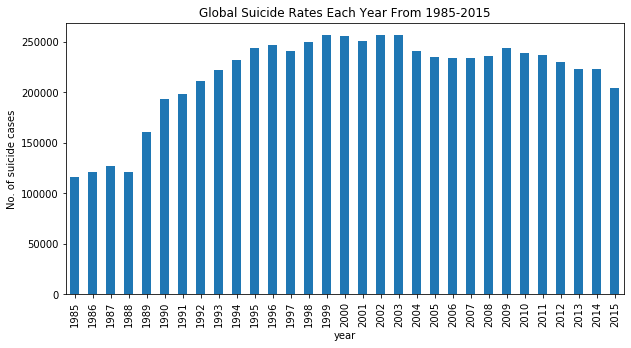

In [251]:
#Chart
df = df[df['year'] != 2016]
#df.groupby('year').suicides_no.sum()

chart = df.groupby('year').suicides_no.sum().plot(kind = 'bar', figsize = (10,5))
chart.set_title("Global Suicide Rates Each Year From 1985-2015")
chart.set_ylabel('No. of suicide cases')

Suicide Rates Per Age Bracket

Findings:
 - Both Millenials and Generation Z started collecting data later than the others. Understandably, this is likely 
   because these generations were too young beforehand to be thinking of suicide.
 - G.I. Generation and the Silent generation experienced steep and urecoverable decline in cases at a certain 
   interval, almost certainly because many in these generations do not live this long. It is worth noting, however,
   that their decline caps out at 20000 per year
 - Both Boomers and Generation X experienced sudden explosions in suicide cases at a certain intervals, 
   with Boomers from 1990-1995 and Generation X from 2009-2010 (both increased by 200%). They did experience
   immediate steep declines, however, at almost the same rate.
 - All generations (except for G.I. Generation) experienced declined in overall cases per year since 2010. 
 - In comparison with the previous chart, despite peak suicide rates from 1999-2003, there is stagnant
   growth in cases all generations except for Millenials (1600% increase) and Silent generation
   - This partly means that cases peaked in this time interval due to a "new generation of suicide"  
 - The common with all of them seems to be that at a certain point, cases would skyrocket, but then just as suddenly and just as rapidy decrease in cases

(0, 35000)

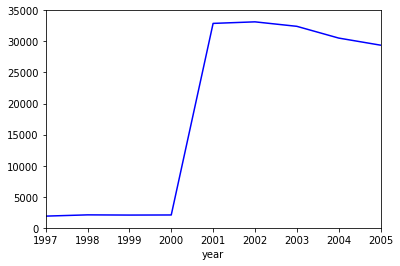

In [252]:
#Data Tests Scratch

#Remove those with 'year' = 2016
df = df[df['year'] != 2016]
df['year'].unique()

c4 = df[df['generation (by age grp avg)'] == 'Generation X'].groupby('year').suicides_no.sum().plot(color = 'blue')
c4.set_xlim(2008, 2015)

c4.set_xlim(1997, 2015)

#--------------------------

c4 = df[df['generation (by age grp avg)'] == 'Millenials'].groupby('year').suicides_no.sum().plot(color = 'blue')
#c4.set_xlim(2008, 2015)

#Chart Comparison Test
c4.set_xlim(1997, 2005)
c4.set_ylim(0,35000)

#df[(df['generation (by age grp avg)'] == 5) & (df['year'] == 2001)].groupby('year').suicides_no.sum()
#Millenial Cases in 2000: 2065 cases
#Millenial Cases in 2001: 32901 cases

(1985, 2015)

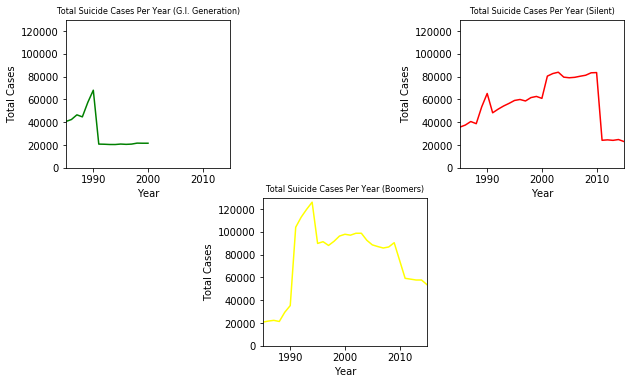

In [253]:
#Chart
fig = plt.figure(figsize = (10,6))

p = fig.add_subplot(231)
c1 = df[df['generation (by age grp avg)'] == 'G.I. Generation'].groupby('year').suicides_no.sum()
p.set_xlabel('Year')
p.set_ylabel('Total Cases')
p.set_title('Total Suicide Cases Per Year (G.I. Generation)', fontsize = 8)
plt.plot(c1, color = 'green')
p.set_ylim(0, 130000)
p.set_xlim(1985,2015)

p = fig.add_subplot(233)
c2 = df[df['generation (by age grp avg)'] == 'Silent'].groupby('year').suicides_no.sum()
p.set_xlabel('Year')
p.set_ylabel('Total Cases')
p.set_title('Total Suicide Cases Per Year (Silent)', fontsize = 8)
plt.plot(c2, color = 'red')
p.set_ylim(0, 130000)
p.set_xlim(1985,2015)

p = fig.add_subplot(235)
c3 = df[df['generation (by age grp avg)'] == 'Boomers'].groupby('year').suicides_no.sum()
p.set_xlabel('Year')
p.set_ylabel('Total Cases')
p.set_title('Total Suicide Cases Per Year (Boomers)', fontsize = 8)
plt.plot(c3, color = 'yellow')
p.set_ylim(0, 130000)
p.set_xlim(1985,2015)

#c1 = df[df['generation (by age grp avg)'] == 1].groupby('year').suicides_no.sum().plot(color = 'green')
#c2 = df[df['generation (by age grp avg)'] == 2].groupby('year').suicides_no.sum().plot(color = 'red')
#c3 = df[df['generation (by age grp avg)'] == 3].groupby('year').suicides_no.sum().plot(color = 'yellow')
#c4 = df[df['generation (by age grp avg)'] == 4].groupby('year').suicides_no.sum().plot(color = 'blue')
#c5 = df[df['generation (by age grp avg)'] == 5].groupby('year').suicides_no.sum().plot(color = 'purple')
#c6 = df[df['generation (by age grp avg)'] == 6].groupby('year').suicides_no.sum().plot(color = 'orange')

(1985, 2015)

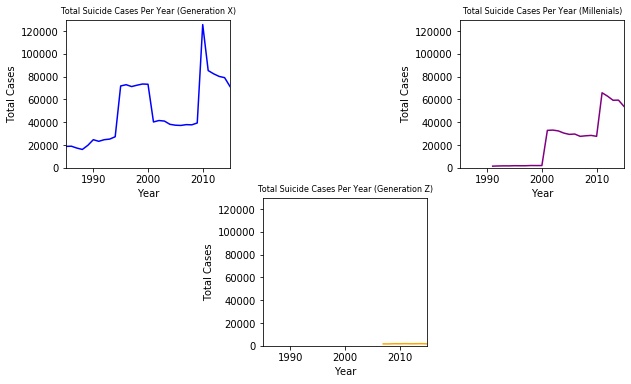

In [254]:
#Chart (Continuation)
fig = plt.figure(figsize = (10,6))

p = fig.add_subplot(231)
c4 = df[df['generation (by age grp avg)'] == 'Generation X'].groupby('year').suicides_no.sum()
p.set_xlabel('Year')
p.set_ylabel('Total Cases')
p.set_title('Total Suicide Cases Per Year (Generation X)', fontsize = 8)
plt.plot(c4, color = 'blue')
p.set_ylim(0, 130000)
p.set_xlim(1985,2015)

p = fig.add_subplot(233)
c5 = df[df['generation (by age grp avg)'] == 'Millenials'].groupby('year').suicides_no.sum()
p.set_xlabel('Year')
p.set_ylabel('Total Cases')
p.set_title('Total Suicide Cases Per Year (Millenials)', fontsize = 8)
plt.plot(c5, color = 'purple')
p.set_ylim(0, 130000)
p.set_xlim(1985,2015)

p = fig.add_subplot(235)
c6 = df[df['generation (by age grp avg)'] == 'Generation Z'].groupby('year').suicides_no.sum()
p.set_xlabel('Year')
p.set_ylabel('Total Cases')
p.set_title('Total Suicide Cases Per Year (Generation Z)', fontsize = 8)
plt.plot(c6, color = 'orange')
p.set_ylim(0, 130000)
p.set_xlim(1985,2015)

Suicide-GDP Per Capita Correlation

Findings:
- Although off topic, it's worth noting that around half of all countries in 2015 have gdp per capita below 20000
    - Upon closer inspection, it is found that 50% of economies have gdp per capita at or below 15115.5 dollars
- Given how much of the data seems to be situated in the bottom left, this may imply that lower gdp per capita means lower       suicide rates per 100k people
    - However, upon comparison between economies below 20000 dollars vs at or over 20000 dollars, there seems to be little change in suicide rates to suggest this, apart from the 50% percentile (4.80 vs 7.86)

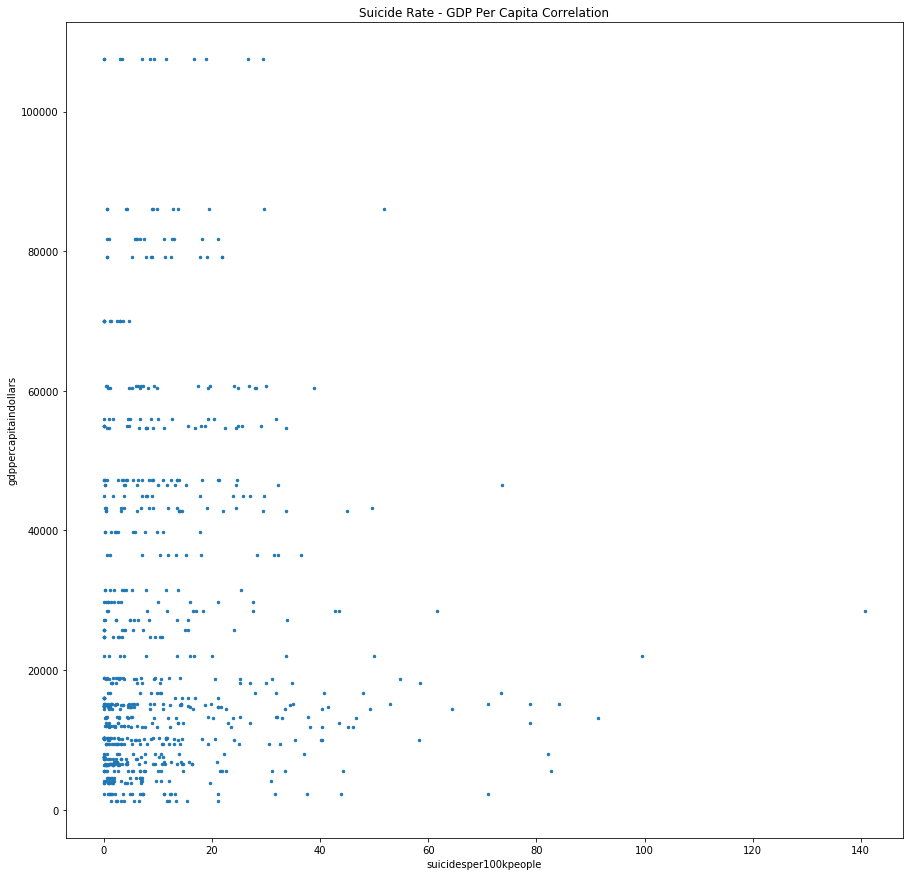

,year,sex,suicides_no,population,suicidesper100kpeople,gdppercapitaindollars
count,744.0,744.000000,744.000000,7.440000e+02,744.000000,744.000000
mean,2015.0,1.500000,273.709677,2.385293e+06,11.094073,26231.193548
std,0.0,0.500336,868.979637,4.768288e+06,15.144091,24035.989653
min,2015.0,1.000000,0.000000,1.076000e+03,0.000000,1285.000000
25%,2015.0,1.000000,5.000000,1.789225e+05,1.307500,9431.000000
50%,2015.0,1.500000,34.000000,5.802350e+05,6.065000,15115.500000
75%,2015.0,2.000000,155.250000,2.317470e+06,14.232500,42830.000000
max,2015.0,2.000000,11634.000000,4.165801e+07,140.740000,107456.000000


In [255]:
#Data Tests Scratch

#Checking for average and most common gdp per capita
test1 = df[df['year'] == 2015]

test1['gdp per capita (in US dollars)'].describe()
test1['suicides_per_100k_people'].describe()

#--------------------------------------------------

toprint = df[(df['year'] == 2015) 
             
#testing for data for countries below 20000 gdp per capita versus at or above 20000
#& (df['gdp per capita (in US dollars)'] < 20000)
#& (df['gdp per capita (in US dollars)'] >= 20000)
            ] 

# "suicides per 100k people" comparison
# < 20000                >= 20000
# mean: 10.625586        mean: 11.787433
# std: 15.459072         std: 14.663576
# 50%: 4.80              50%: 7.86
# 75%: 13.1225           75%: 16.7525

toprint = toprint.rename(columns={'suicides_per_100k_people':'suicidesper100kpeople'})
toprint = toprint.rename(columns={'gdp per capita (in US dollars)':'gdppercapitaindollars'})
toprint = toprint.rename(columns={'gdp for year (in US dollars)':'gdp'})
#Suicide Rate - GDP Per Capita Correlation

#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111)
#ax.plot(toprint.suicidesper100kpeople, toprint.gdppercapitaindollars, alpha = 0.6)

ax = toprint.plot.scatter(x = 'suicidesper100kpeople', y = 'gdppercapitaindollars', title = 'Suicide Rate - GDP Per Capita Correlation', 
                          s = 6, figsize=(15,15))
plt.show(block = True)

toprint.describe()

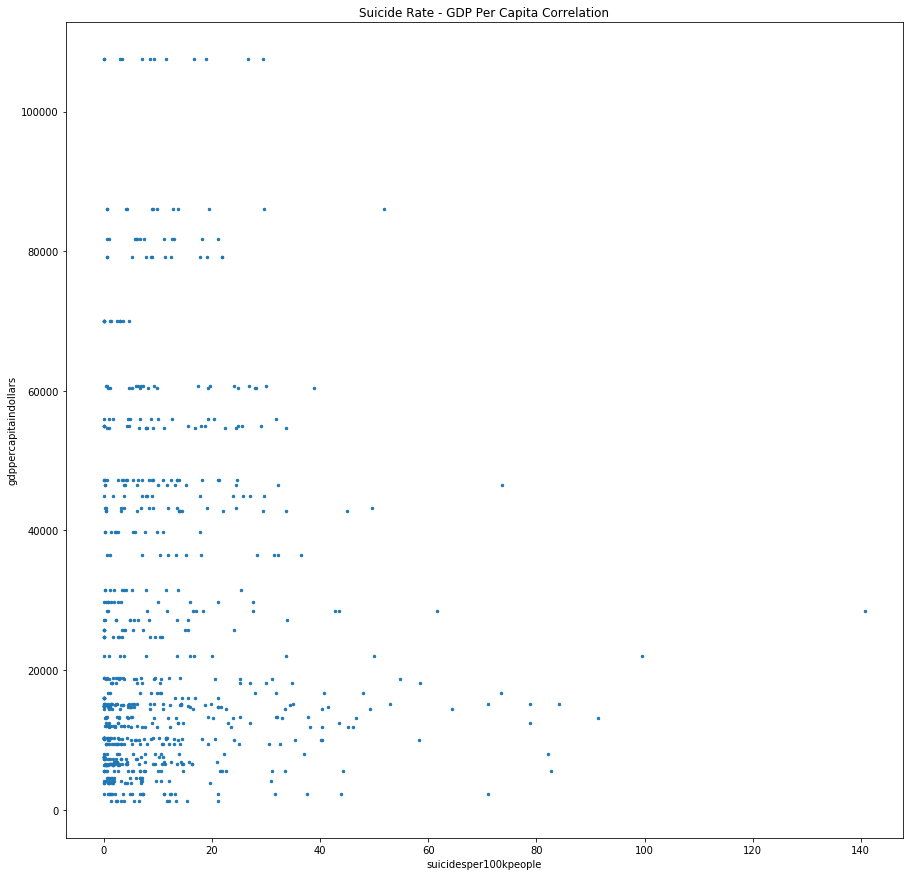

In [256]:
#Chart

toprint = df[df['year'] == 2015] 

toprint = toprint.rename(columns={'suicides_per_100k_people':'suicidesper100kpeople'})
toprint = toprint.rename(columns={'gdp per capita (in US dollars)':'gdppercapitaindollars'})

#Suicide Rate - GDP Per Capita Correlation

#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111)
#ax.plot(toprint.suicidesper100kpeople, toprint.gdppercapitaindollars, alpha = 0.6)

ax = toprint.plot.scatter(x = 'suicidesper100kpeople', y = 'gdppercapitaindollars', title = 'Suicide Rate - GDP Per Capita Correlation', 
                          s = 6, figsize=(15,15))
plt.show(block = True)

Suicide-Sex Correlation

Findings:
 - After doing some basic testing, already I have found the anomaly that there seems to be far less overall suicide rates among    women than men. This is referenced by the fact that there are far more 0.00 cases among women (2643) than men (1618),          considering how they both have equal instances
 
  - After checking the statistics of each sex using the ".describe()" feature, some shocking observations have been discovered:
      - the mean suicide rates for males is 20.229007, while for females it is only 5.396188.  
      - more than half of all male suicide rates have a rate of 13.52 or less, while for females it is only 3.16
      - for the 75% percentile, male suicide rates can go as high as 27.36, and 7.41 for females
  - This can very well imply that female suicide rates are much smaller than that of males (by as much as 73.3% lower).
  - The average suicide case for males seems to have rather sharply, especially in 1995, before decreasing at an almost equivalent rate. Unlike male cases, female cases have remain stagnant for the 30 years.
      - Coincidentally, there was also a sharp spike in cases by Boomers and Gen X at around 1995 as well. This could mean that there was a sharp spike around this time made primarily by Males of Gen X or Boomer Generations. Also concerning this, in 1995, these two generations composed 50% of all generations checked that year

In [257]:
#Data Tests Scratch

#Male
test = df[(df['sex'] == 1) 
        #  & (df['year'] == 1985)
         ]

#test.head(25)

test.suicides_per_100k_people.value_counts().head(25)
#Most common values
#0.00    1618
#0.32      30
#0.29      27
#0.28      24
#0.33      23

#Female
test = df[(df['sex'] == 2) 
        #  & (df['year'] == 1985)
         ]
test.suicides_per_100k_people.value_counts().head(25)

#test.groupby('suicides_per_100k_people').suicides_per_100k_people.value_counts().head(25)

#Most common values
#0.00    2643
#0.29      45
#0.32      39
#0.34      37
#0.22      36

#-------------------------
test = df[(df['sex'] == 1) 
        #  & (df['year'] == 1985)
         ]
test.shape
#13830 values for male

test = df[(df['sex'] == 2) 
        #  & (df['year'] == 1985)
         ]
test.shape
#13830 values for female

#------------------------
df.groupby('sex').suicides_per_100k_people.describe()
#------------------------
test = df[(df['sex'] == 2) 
         #& (df['generation (by age grp avg)'] == 1)
         ]
#test.groupby('year').suicides_per_100k_people.value_counts().plot(kind = 'line')

#values tested
#year = 1985, 2015
#sex = 1, 2
df[(df['year'] == 1985) & (df['sex'] == 1)].groupby('sex').suicides_per_100k_people.value_counts().describe()

test = df
test = test.rename(columns={'generation (by age grp avg)':'gen'})
test[test['year'] == 1995].gen.value_counts().sum()

936

year
1985    17.875486
1986    17.033993
1987    17.556296
1988    19.095408
1989    19.581314
1990    19.818906
1991    20.849792
1992    20.747462
1993    21.636154
1994    21.906520
1995    24.905256
1996    24.296472
1997    23.903983
1998    23.774198
1999    23.196305
2000    22.099651
2001    21.546345
2002    21.966996
2003    21.107655
2004    19.909762
2005    19.129286
2006    19.085863
2007    19.056667
2008    18.835961
2009    18.273333
2010    18.025682
2011    17.686376
2012    18.321811
2013    17.849708
2014    17.564124
2015    17.534677
Name: suicides_per_100k_people, dtype: float64

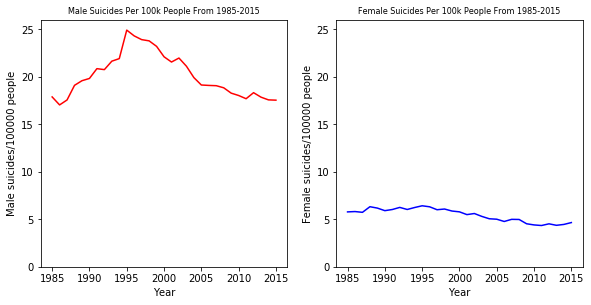

In [258]:
#Chart

fig = plt.figure(figsize = (15,10))

p = fig.add_subplot(231)
ax = df[df['sex'] == 1].groupby('year').suicides_per_100k_people.mean()
p.set_xlabel('Year')
p.set_ylabel('Male suicides/100000 people')
p.set_title('Male Suicides Per 100k People From 1985-2015', fontsize = 8)
plt.plot(ax, color = 'red')
p.set_ylim(0,26)

p = fig.add_subplot(232)
bx = df[df['sex'] == 2].groupby('year').suicides_per_100k_people.mean()
p.set_xlabel('Year')
p.set_ylabel('Female suicides/100000 people')
p.set_title('Female Suicides Per 100k People From 1985-2015', fontsize = 8)
plt.plot(bx, color = 'blue')
p.set_ylim(0,26)

df[df['sex'] == 1].groupby('year').suicides_per_100k_people.mean().unique()
df['year'].unique()

df[df['sex'] == 1].groupby('year').suicides_per_100k_people.mean()

<b><h1>Data Visualization</b></h1>

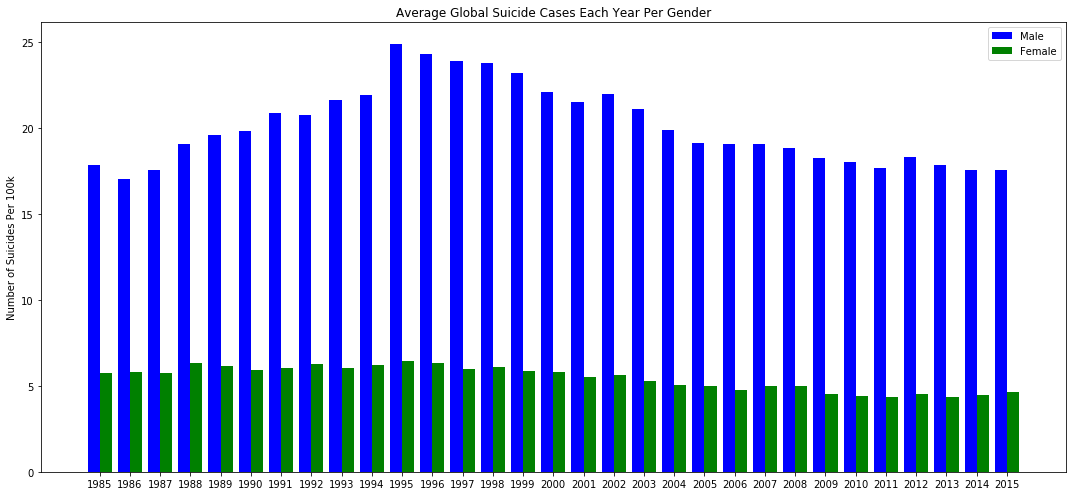

In [259]:
#df['year'].unique() was not in order so I had to manually input each one :(
labels = [1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,
          2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]

men_means = df[df['sex'] == 1].groupby('year').suicides_per_100k_people.mean().unique()
women_means = df[df['sex'] == 2].groupby('year').suicides_per_100k_people.mean().unique()

x = np.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots(figsize = (15,7))
rects1 = ax.bar(x - width/2.0, men_means, width, label='Male', color = 'blue')
rects2 = ax.bar(x + width/2.0, women_means, width, label='Female', color = 'green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Suicides Per 100k')
ax.set_title('Average Global Suicide Cases Each Year Per Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Text(0, 0.5, 'Suicides Per 100k People')

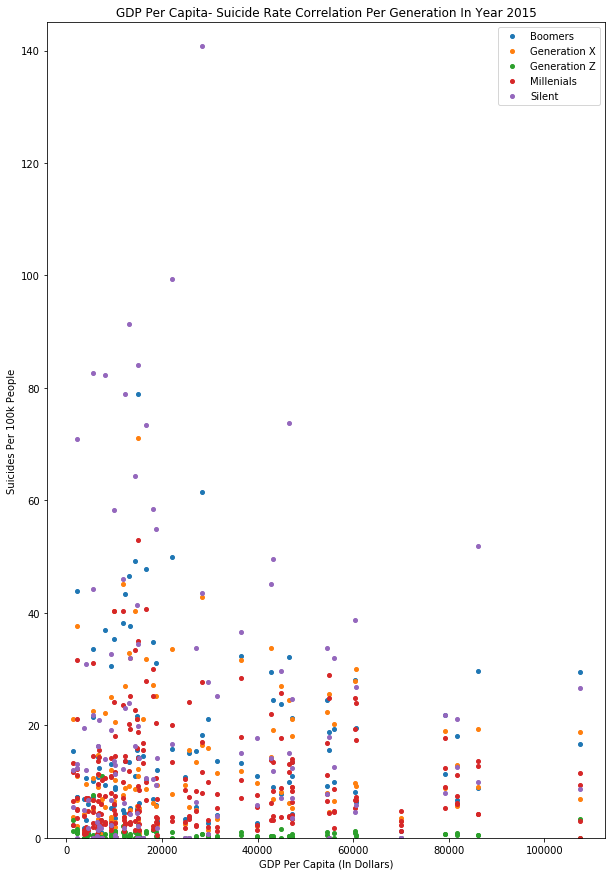

In [260]:
toprint = df[df['year'] == 2015] 

toprint = toprint.rename(columns={'suicides_per_100k_people':'suicidesper100kpeople'})
toprint = toprint.rename(columns={'gdp per capita (in US dollars)':'gdppercapitaindollars'})
toprint = toprint.rename(columns={'gdp for year (in US dollars)':'gdp'})

fig, ax = plt.subplots(figsize = (10,15))
groups = toprint.groupby('generation (by age grp avg)')


for name, group in groups:
    ax.plot(group.gdppercapitaindollars, group.suicidesper100kpeople, marker='o', linestyle='', ms=4, 
label = name)
ax.legend(numpoints=1)
ax.set_ylim((0, 145))

ax.set_title('GDP Per Capita- Suicide Rate Correlation Per Generation In Year 2015')
ax.set_xlabel('GDP Per Capita (In Dollars)')
ax.set_ylabel('Suicides Per 100k People')

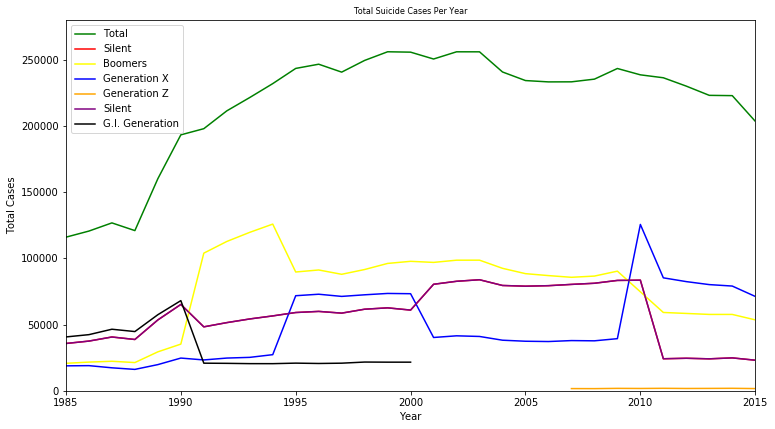

In [302]:
fig = plt.figure(figsize = (42,15))

p = fig.add_subplot(231)
c1 = df.groupby('year').suicides_no.sum()
plt.plot(c1, color = 'green', label = 'Total')
p.set_ylim(0, 280000)
p.set_xlim(1985,2015)

#p = fig.add_subplot(231)
c2 = df[df['generation (by age grp avg)'] == 'Silent'].groupby('year').suicides_no.sum()
plt.plot(c2, color = 'red', label = 'Silent')
p.set_ylim(0, 280000)
p.set_xlim(1985,2015)

#p = fig.add_subplot(231)
c3 = df[df['generation (by age grp avg)'] == 'Boomers'].groupby('year').suicides_no.sum()
plt.plot(c3, color = 'yellow', label = 'Boomers')
p.set_ylim(0, 280000)
p.set_xlim(1985,2015)

c4 = df[df['generation (by age grp avg)'] == 'Generation X'].groupby('year').suicides_no.sum()
plt.plot(c4, color = 'blue', label = 'Generation X')
p.set_ylim(0, 280000)
p.set_xlim(1985,2015)

c5 = df[df['generation (by age grp avg)'] == 'Generation Z'].groupby('year').suicides_no.sum()
plt.plot(c5, color = 'orange', label = 'Generation Z')
p.set_ylim(0, 280000)
p.set_xlim(1985,2015)

c6 = df[df['generation (by age grp avg)'] == 'Silent'].groupby('year').suicides_no.sum()
plt.plot(c6, color = 'purple', label = 'Silent')
p.set_ylim(0, 280000)
p.set_xlim(1985,2015)


c7 = df[df['generation (by age grp avg)'] == 'G.I. Generation'].groupby('year').suicides_no.sum()
plt.plot(c7, color = 'black', label = 'G.I. Generation')
p.set_ylim(0, 280000)
p.set_xlim(1985,2015)

p.set_xlabel('Year')
p.set_ylabel('Total Cases')
p.set_title('Total Suicide Cases Per Year', fontsize = 8)


p.legend(loc = "upper left")